In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import pydot
#import pydotplus as pydot
from IPython.display import Image
from IPython.display import display
from sklearn.externals.six import StringIO

# from bokeh.io import output_notebook
# from bokeh.plotting import figure, show, ColumnDataSource
# from bokeh.models import HoverTool
# output_notebook()

import warnings

warnings.filterwarnings('ignore')

sns.set(style='white', context='notebook', palette='deep')

np.random.seed(seed=2)

In [3]:
data = pd.read_csv("/Users/benjaminfocktern/Desktop/Data_Mining (IN3011)/Project/HR_data.csv")

In [4]:
data.rename(columns={'number_project':'projects'}, inplace = True)
data.rename(columns={'average_montly_hours':'avg_monthly_hours'}, inplace = True)
data.rename(columns={'time_spend_company':'time_spent_at_company'}, inplace = True)
data.rename(columns={'Work_accident':'work_accident'}, inplace = True)
data.rename(columns={'sales':'department'}, inplace = True)

In [5]:
#move left to the back
cols = data.columns.tolist()
cols.insert(10, cols.pop(cols.index('left')))
data = data.reindex(columns= cols)

In [6]:
data.head(n=6)

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
5,0.41,0.50,2,153,3,0,0,sales,low,1


In [7]:
#move left to the front
front = data['left']
data.drop(labels=['left'], axis=1,inplace = True)
data.insert(0, 'left', front)
data.head()

,left,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,promotion_last_5years,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [8]:
turnover_rate = data.left.value_counts() / len(data)
turnover_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

T-Test (below)

In [9]:
emp_population = data['satisfaction_level'][data['left'] == 0].mean()
emp_turnover_satisfaction = data[data['left']==1]['satisfaction_level'].mean()

print( 'The mean satisfaction for employee population who stayed is: ' + str(emp_population))
print( 'The mean satisfaction for employees population that left is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for employee population who stayed is: 0.66680959048
The mean satisfaction for employees population that left is: 0.440098011761


In [ ]:
st.ttest_1samp(a=  data[data['left']==1]['satisfaction_level'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

In [26]:
degree_freedom = len(data[data['left']==1])

LQ = st.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = st.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


Dimensionality Reduction

In [42]:
data = data.drop(labels=["department"],axis = 1)

In [43]:
data["salary"] = data["salary"].astype("category",ordered=True, categories = ['low','medium','high']).cat.codes

In [44]:
N = StandardScaler()
N.fit(data)
data_norm = N.transform(data)

In [45]:
index = np.random.randint(0,data_norm.shape[0],size=8000)

In [46]:
pca = PCA(n_components=2)
pca_representation = pca.fit_transform(data_norm[index])

In [47]:
iso = Isomap(n_components=2, n_neighbors=40)
iso_representation = iso.fit_transform(data_norm[index])

Text(0.5,1,u'Isomap')

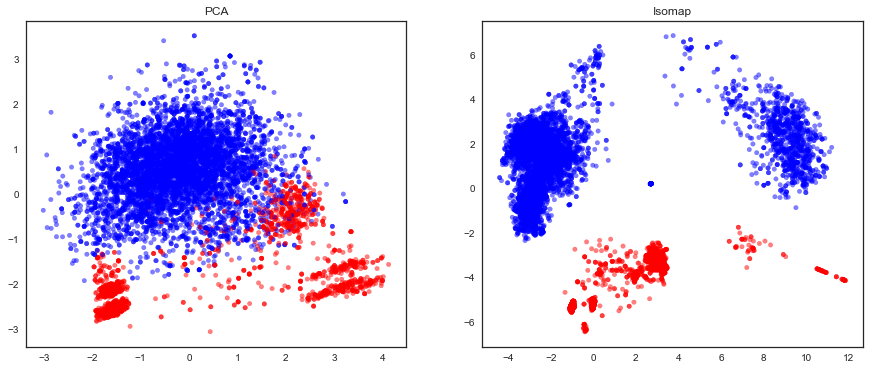

In [48]:
left_colors = data["left"].map(lambda s : "b" if s==0 else "r")
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(pca_representation[:,0],pca_representation[:,1],
            c = left_colors[index],alpha=0.5,s=20)
axes[0].set_title("PCA")
axes[1].scatter(iso_representation[:,0],iso_representation[:,1],
            c = left_colors[index],alpha=0.5,s=20)
axes[1].set_title("Isomap")

In [49]:
print pca.components_

[[-0.15466669  0.47628145  0.55906693  0.54095109  0.32233294 -0.06821813
   0.18754567 -0.00584545 -0.01704403]
 [ 0.58355942  0.27750059  0.09279646  0.13519911 -0.0916641   0.23960084
  -0.61423581  0.18697783  0.27839654]]


In [53]:
print iso.get_params

<bound method Isomap.get_params of Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=40, neighbors_algorithm='auto', path_method='auto', tol=0)>


Cluster Analysis #1: Kmeans

In [125]:
data_stay = data[data["left"]==0]
data_left = data[data["left"]==1]
kmeans = KMeans(n_clusters=3, random_state=5)
kmeans.fit(data_left[["satisfaction_level","last_evaluation"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

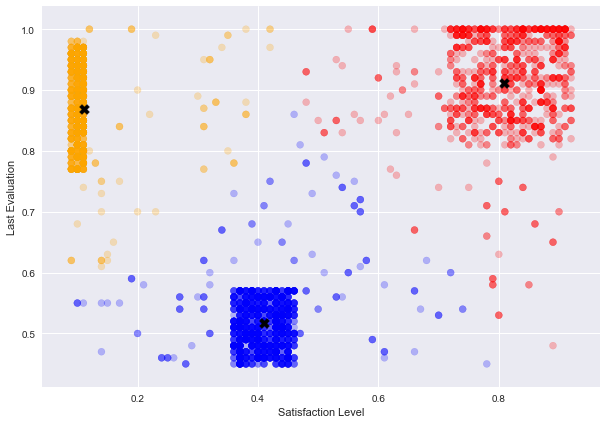

In [126]:
kmeans_colors = ['red' if c == 0 else 'orange' if c == 2 else 'blue' for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 7))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=data_left, alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.show()

Cluster Analysis #1: DBSCAN

In [117]:
data.head(n=6)

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,0,1
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,0,1
4,0.37,0.52,2,159,3,0,0,sales,0,1
5,0.41,0.50,2,153,3,0,0,sales,0,1


In [12]:
X1 = data.drop(['left'],axis = 1)
Y1 = data.left

In [119]:
X.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,0
1,0.80,0.86,5,262,6,0,0,sales,1
2,0.11,0.88,7,272,4,0,0,sales,1
3,0.72,0.87,5,223,5,0,0,sales,0
4,0.37,0.52,2,159,3,0,0,sales,0


In [120]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [121]:
department = pd.get_dummies(X["department"])
salary = pd.get_dummies(X["salary"])

In [122]:
X = X.drop(['department', 'salary'], axis = 1)

In [123]:
X = pd.concat([X, department, salary], axis = 1)

In [124]:
X.shape

(14999, 20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 147)

In [19]:
dat = StandardScaler().fit_transform(X_train, Y_train)

In [364]:
db = DBSCAN(eps=3, min_samples=400).fit(dat)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [365]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [366]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

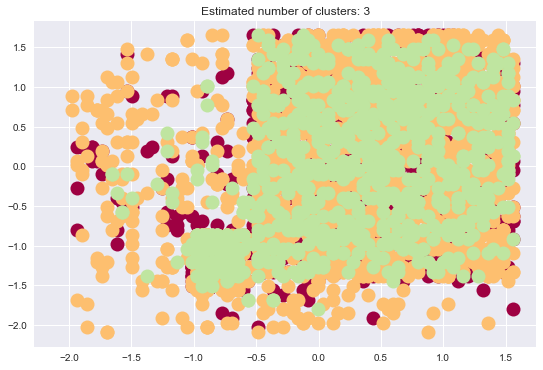

In [367]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = dat[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = dat[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=0, alpha = 0.9)

plt.title('Estimated number of clusters: %d' % n_clusters_)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.gcf().set_size_inches(*fig_size)
plt.show()

Decision Tree

In [8]:
dataset = data.drop(labels=["department"],axis = 1)

In [9]:
dataset["salary"] = dataset["salary"].astype("category",ordered=True, categories = ['low','medium','high']).cat.codes

In [14]:
X_train["salary"] = X_train["salary"].astype("category",ordered=True, categories = ['low','medium','high']).cat.codes

In [15]:
X_test["salary"] = X_test["salary"].astype("category",ordered=True, categories = ['low','medium','high']).cat.codes

In [16]:
X_train["department"] = X_train["department"].astype("category",ordered=True, categories = ['sales','accounting','hr','technical','support','management','IT','product_mng','marketing','RandD']).cat.codes

In [17]:
X_test["department"] = X_test["department"].astype("category",ordered=True, categories = ['sales','accounting','hr','technical','support','management','IT','product_mng','marketing','RandD']).cat.codes

In [78]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [59]:
data.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.4, random_state = 147)

In [83]:
Y_train.head()

1189     1
12899    0
6179     0
13474    0
8707     0
Name: left, dtype: int64

In [62]:
## Prediction of the target variable (stay/left) 

X_train = data.drop(labels = "left",axis = 1)

Y_train = data["left"]

train_features = X_train.columns

In [36]:
kfold = StratifiedKFold(Y_train,n_folds=10,random_state=2)

In [98]:
DTC = DecisionTreeClassifier(max_depth=100)
cv_results = cross_val_score(DTC,X_train, Y_train, cv=kfold, scoring="accuracy")
cv_results.mean()

0.98200124361536756

In [81]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

<IPython.core.display.Image object>

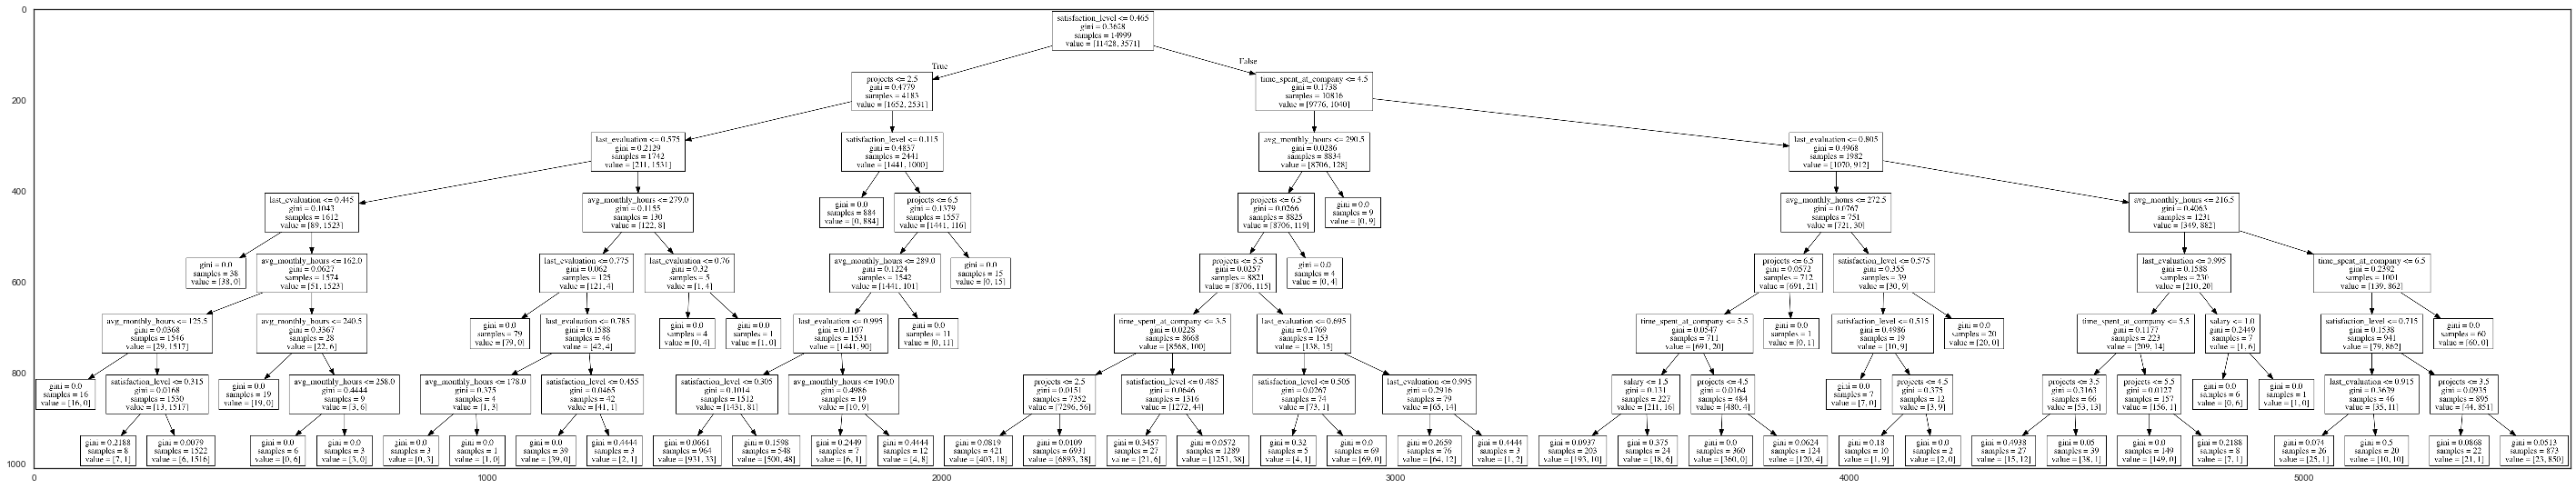

In [82]:
dot_data = StringIO()
tree.export_graphviz(DTC, out_file=dot_data,feature_names=train_features)

graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.set_lwidth(200)
graph.set_lheight(100)

display(Image(graph))
png_str = graph.create_png(prog='dot')
sio = StringIO()
sio.write(png_str)
sio.seek(0)
img = mpimg.imread(sio)
imgplot = plt.imshow(img, aspect='equal')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size
plt.gcf().set_size_inches(*fig_size)
plt.show(block=False)

Random Forest Classifier

In [6]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc_score_train = rfc.score(X_train, Y_train)
print("Train set accyracy score: " + str(rfc_score_train))
rfc_score_test = rfc.score(X_test, Y_test)
print("Test set accuracy score: " + str(rfc_score_test))

Train set accyracy score: 0.997333037004
Test set accuracy score: 0.988666666667


In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(Y_test, rfc.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(Y_test, rfc.predict(X_test)))




 ---Random Forest Model---
Random Forest AUC = 0.98
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4545
          1       1.00      0.96      0.98      1455

avg / total       0.99      0.99      0.99      6000



In [88]:
from sklearn.metrics import roc_curve

In [22]:
preds = rfc.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, preds)

array([[4538,    7],
       [  61, 1394]])

In [ ]:
help(confusion_matrix)

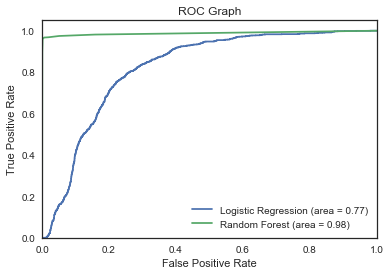

In [51]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rfc.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [42]:
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
rfc_score_train = rfc.score(X_train, Y_train)
rf_roc_auc = roc_auc_score(Y_test, rfc.predict(X_test))

In [50]:
logit_roc_auc = roc_auc_score(Y_test, logis.predict(X_test))